<a href="https://colab.research.google.com/github/AryaSuryaaa/Pengembangan-Machine-Learning/blob/main/Sub1Dicoding_90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>I Kadek Arya Surya Saputra (suryasaputra914@gmail.com)</h1>
<h2>Submission 1 Belajar pengembangan machine learning</h2>

In [ ]:
# Import library yang diperlukan
import pandas as pd
import re

In [ ]:
# ubah dataset menjadi dataframe
df = pd.read_csv('kaggle_movie_train.csv')

In [ ]:
# Panggil fungsi head() pada dataframe untuk menampilkan 5 sampel teratas pada dataset.
df.head()

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",thriller
1,2,"t, summa cum laude and all. And I'm about to l...",comedy
2,3,"up Come, I have a surprise.... She takes him ...",drama
3,4,ded by the two detectives. INT. JEFF'S APARTME...,thriller
4,5,"nd dismounts, just as the other children reach...",drama


In [ ]:
# data columns
df.columns

Index(['id', 'text', 'genre'], dtype='object')

In [ ]:
# total data
df.shape

(22579, 3)

In [ ]:
# data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22579 entries, 0 to 22578
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      22579 non-null  int64 
 1   text    22579 non-null  object
 2   genre   22579 non-null  object
dtypes: int64(1), object(2)
memory usage: 529.3+ KB


In [ ]:
# genre
df.genre.value_counts()

drama        8873
thriller     6824
comedy       2941
action       2392
sci-fi        613
horror        456
other         270
adventure     147
romance        63
Name: genre, dtype: int64

# Cleansing Data

In [ ]:
# Menghapus genre selain 5 genre tersebut
df = df[~df['genre'].isin(['thriller','other','sci-fi','romance'])]
df['genre'].value_counts()

drama        8873
comedy       2941
action       2392
horror        456
adventure     147
Name: genre, dtype: int64

In [ ]:
# Menghapus special character di kolom text
df['Text'] = df['text'].map(lambda x: re.sub(r'\W+', ' ', x))

In [ ]:
# # delete columns (unused column)
df_new = df.drop(columns=['id'])
df_new

,text,genre,Text
1,"t, summa cum laude and all. And I'm about to l...",comedy,t summa cum laude and all And I m about to lau...
2,"up Come, I have a surprise.... She takes him ...",drama,up Come I have a surprise She takes him by th...
4,"nd dismounts, just as the other children reach...",drama,nd dismounts just as the other children reach ...
7,ELLES AND RITA HAYWORTH Just disgustingly rich...,drama,ELLES AND RITA HAYWORTH Just disgustingly rich...
9,e reels as the world spins. Sweat pours off hi...,action,e reels as the world spins Sweat pours off him...
...,...,...,...
22573,"Well hello, officer. WYDELL holding up his ba...",horror,Well hello officer WYDELL holding up his badg...
22574,n in the world to decide what I'm going to do ...,drama,n in the world to decide what I m going to do ...
22575,shards. BOJO LAZ! Laz pushes Deke back through...,drama,shards BOJO LAZ Laz pushes Deke back through t...
22577,....with marked skill and dexterity . LANA wry...,action,with marked skill and dexterity LANA wryly Yo...


In [ ]:
# Mengecek nilai kosong / nan
# Jika true maka ada dan jika false maka tidak ada nilai kosong / nan
df.isnull().values.any()

False

# Model and Plot

Karena label  berupa data kategorikal, maka  perlu melakukan proses one-hot-encoding


In [ ]:
# melakukan one-hot-encoding dan membuat dataframe baru.
genre = pd.get_dummies(df_new.genre)
df_new_gen = pd.concat([df_new, genre], axis=1)
df_new_gen = df_new_gen.drop(columns='genre')
df_new_gen.head(10)

,text,Text,action,adventure,comedy,drama,horror
1,"t, summa cum laude and all. And I'm about to l...",t summa cum laude and all And I m about to lau...,0,0,1,0,0
2,"up Come, I have a surprise.... She takes him ...",up Come I have a surprise She takes him by th...,0,0,0,1,0
4,"nd dismounts, just as the other children reach...",nd dismounts just as the other children reach ...,0,0,0,1,0
7,ELLES AND RITA HAYWORTH Just disgustingly rich...,ELLES AND RITA HAYWORTH Just disgustingly rich...,0,0,0,1,0
9,e reels as the world spins. Sweat pours off hi...,e reels as the world spins Sweat pours off him...,1,0,0,0,0
10,ng nasty now. Percy starts to play an old reli...,ng nasty now Percy starts to play an old relig...,0,0,0,1,0
11,maps you know. Swines. Before the war we help...,maps you know Swines Before the war we helped...,0,0,0,1,0
12,"ng ones always break your heart. Donna nods, g...",ng ones always break your heart Donna nods ges...,0,0,0,1,0
13,ilm feeling to it. Andrew WHIPS AROUND to face...,ilm feeling to it Andrew WHIPS AROUND to face ...,0,0,0,1,0
14,ousse as JACK watches in silence. PARRY molds ...,ousse as JACK watches in silence PARRY molds h...,0,0,0,1,0


Agar dapat diproses oleh model, kita perlu mengubah nilai-nilai dari dataframe ke dalam tipe data numpy array menggunakan atribut values.


In [ ]:
# Mengubah nilai dataframe menjadi numpy array
summary = df_new_gen['text'].astype(str)
genre = df_new_gen[['action','adventure','comedy','drama','horror']].values

In [ ]:
# view summary array
summary

1        t, summa cum laude and all. And I'm about to l...
2         up Come, I have a surprise.... She takes him ...
4        nd dismounts, just as the other children reach...
7        ELLES AND RITA HAYWORTH Just disgustingly rich...
9        e reels as the world spins. Sweat pours off hi...
                               ...                        
22573     Well hello, officer. WYDELL holding up his ba...
22574    n in the world to decide what I'm going to do ...
22575    shards. BOJO LAZ! Laz pushes Deke back through...
22577    ....with marked skill and dexterity . LANA wry...
22578    rd walks off down the hallway, leaving his pos...
Name: text, Length: 14809, dtype: object

In [ ]:
# view genre array
genre

array([[0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       ...,
       [0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0]], dtype=uint8)

In [ ]:
# mem bagi data untuk training dan data untuk testing
from sklearn.model_selection import train_test_split
summary_train, summary_test, genre_train, genre_test = train_test_split(summary, genre, test_size=0.2)

In [ ]:
# tokenizer
# ubah setiap kata pada dataset kita ke dalam bilangan numerik dengan fungsi Tokenizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(summary_train)
tokenizer.fit_on_texts(summary_test)

# mengonversi setiap sampel menjadi sequence
sekuens_train = tokenizer.texts_to_sequences(summary_train)
sekuens_test = tokenizer.texts_to_sequences(summary_test)

padded_train = pad_sequences(sekuens_train)
padded_test = pad_sequences(sekuens_test)

In [ ]:
# model
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(5, activation='softmax')
])

model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy',)
model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, None, 16)          80000     
                                                                 
 lstm_6 (LSTM)               (None, 64)                20736     
                                                                 
 dense_12 (Dense)            (None, 128)               8320      
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_13 (Dense)            (None, 5)                 645       
                                                                 
Total params: 109701 (428.52 KB)
Trainable params: 109701 (428.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('val_accuracy') is not None and logs.get('val_accuracy') > 0.9:
            print("\nAkurasi telah mencapai > 90%!")
            self.model.stop_training = True

callbacks = myCallback()

In [ ]:
# model fit
history = model.fit(padded_train, genre_train, epochs=50, validation_data=(padded_test, genre_test), verbose=2, callbacks=[callbacks])

Epoch 1/50
371/371 - 19s - loss: 1.0224 - accuracy: 0.6211 - val_loss: 0.7569 - val_accuracy: 0.6897 - 19s/epoch - 51ms/step
Epoch 2/50
371/371 - 5s - loss: 0.6290 - accuracy: 0.7388 - val_loss: 0.6194 - val_accuracy: 0.7451 - 5s/epoch - 13ms/step
Epoch 3/50
371/371 - 5s - loss: 0.5250 - accuracy: 0.7844 - val_loss: 0.6208 - val_accuracy: 0.7458 - 5s/epoch - 15ms/step
Epoch 4/50
371/371 - 4s - loss: 0.4682 - accuracy: 0.8128 - val_loss: 0.6293 - val_accuracy: 0.7792 - 4s/epoch - 11ms/step
Epoch 5/50
371/371 - 4s - loss: 0.3344 - accuracy: 0.8897 - val_loss: 0.5727 - val_accuracy: 0.8484 - 4s/epoch - 11ms/step
Epoch 6/50
371/371 - 5s - loss: 0.2621 - accuracy: 0.9208 - val_loss: 0.4783 - val_accuracy: 0.8720 - 5s/epoch - 14ms/step
Epoch 7/50
371/371 - 4s - loss: 0.1652 - accuracy: 0.9459 - val_loss: 0.5177 - val_accuracy: 0.8758 - 4s/epoch - 12ms/step
Epoch 8/50
371/371 - 4s - loss: 0.1299 - accuracy: 0.9577 - val_loss: 0.4952 - val_accuracy: 0.8774 - 4s/epoch - 12ms/step
Epoch 9/50
371

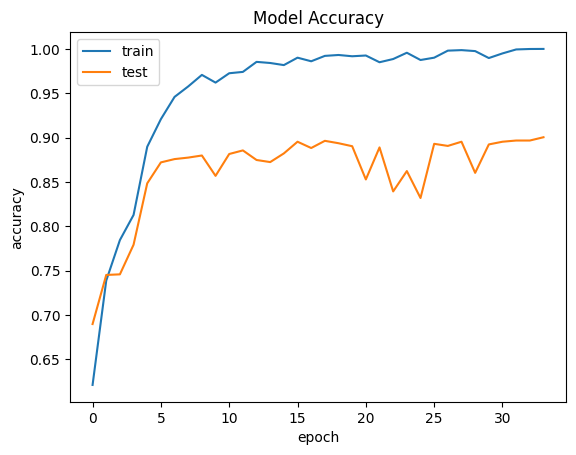

In [ ]:
# plot of accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

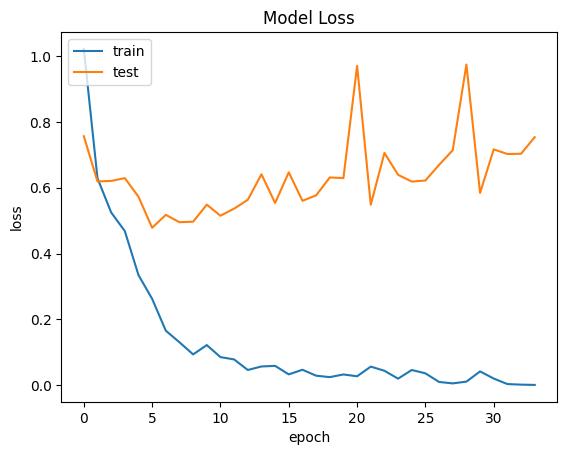

In [ ]:
# plot of loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()